In [1]:
using Crystalline, MPBUtils, JLD2, LinearAlgebra, StaticArrays, SymmetryBases, PyPlot,
DelimitedFiles, PrettyTables, Brillouin, 
Statistics, PyCall

In [2]:
include("plotting_utilities.jl")

plotiso (generic function with 5 methods)

In [3]:
# finding optimal candidates
# Criteria for optimal candidates:
    # 1. Clearly show symmetry of the spacegroup
    # 2. Do not show additional symmetries
    # 3. Do not have fine features

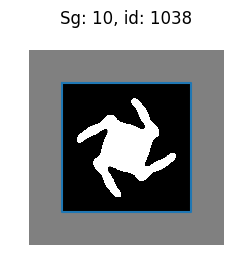

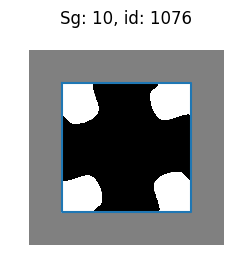

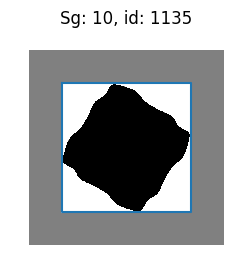

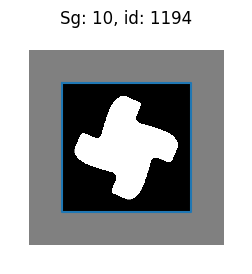

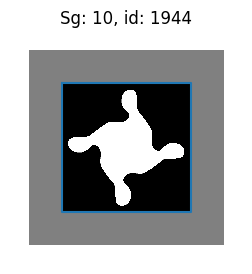

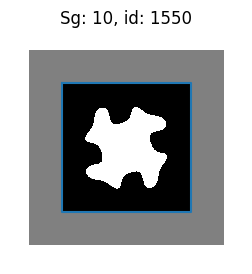

In [4]:
boundaries = 0.9
for sg in 10
for id in [1038, 1076, 1135, 1194, 1944, 1550]
    fig = figure(figsize=(3, 4))
    calcname = "./symeigs/input/dim2-sg$(sg)-$id-res64-tm.sh"
    title("Sg: $sg, id: $id")
    Rs, flat, isoval, _ = lattice_from_mpbparams(calcname)
    wigner_cell = wignerseitz(Rs)
    wigner_plot(flat, Rs, wigner_cell; isoval=isoval, fig=fig, ax=gca(), in_polygon=true)

    xlim(-boundaries, boundaries)
    ylim(-boundaries, boundaries)
end
end

In [3]:
ph_candidates = [1090, 355, 73, 1194, 493, 1074, 20, 1457, 257, 3062, 91];

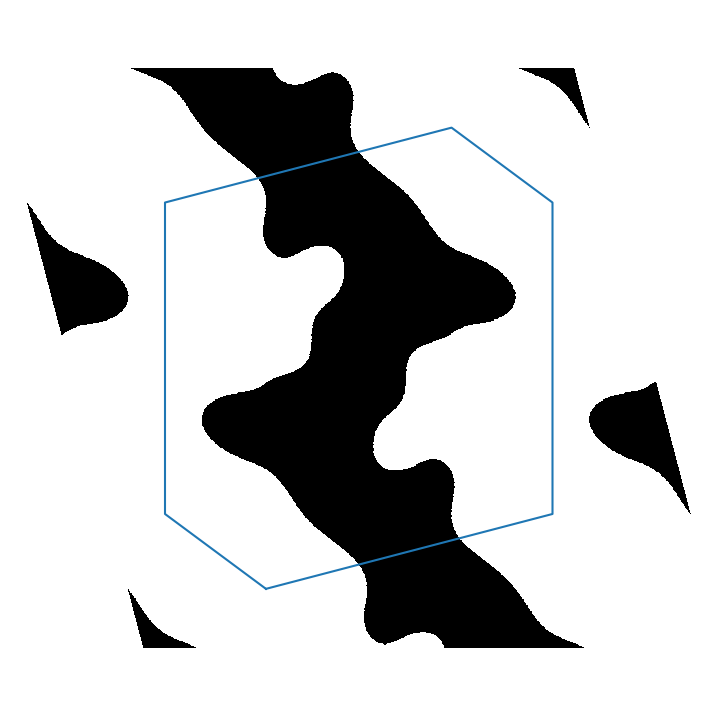

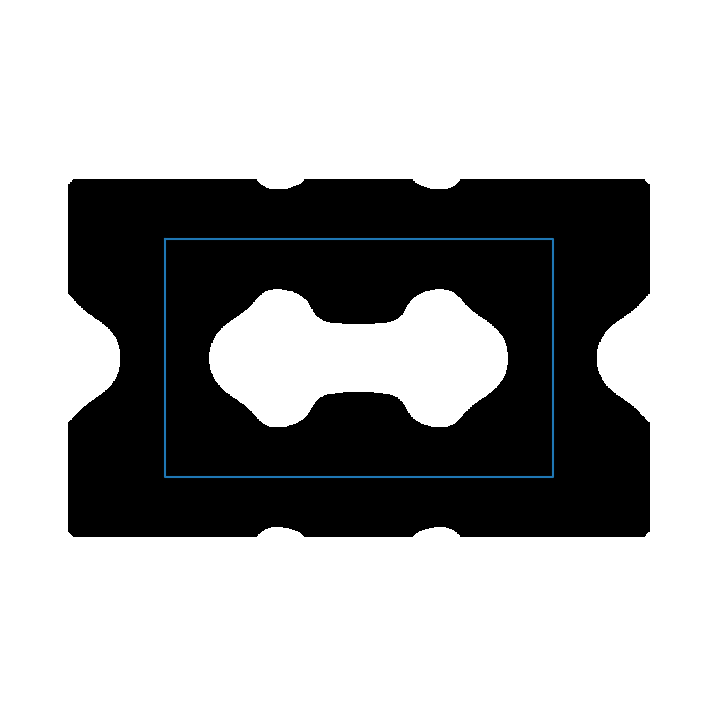

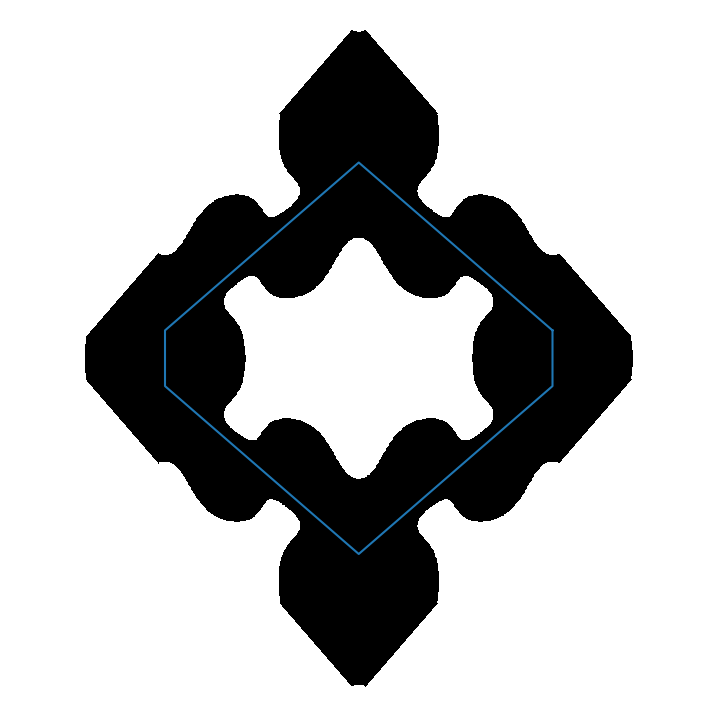

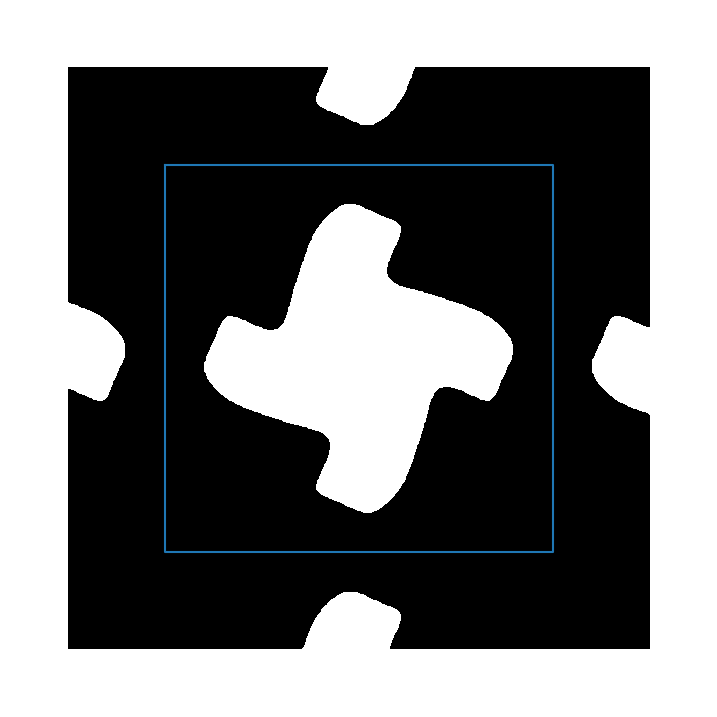

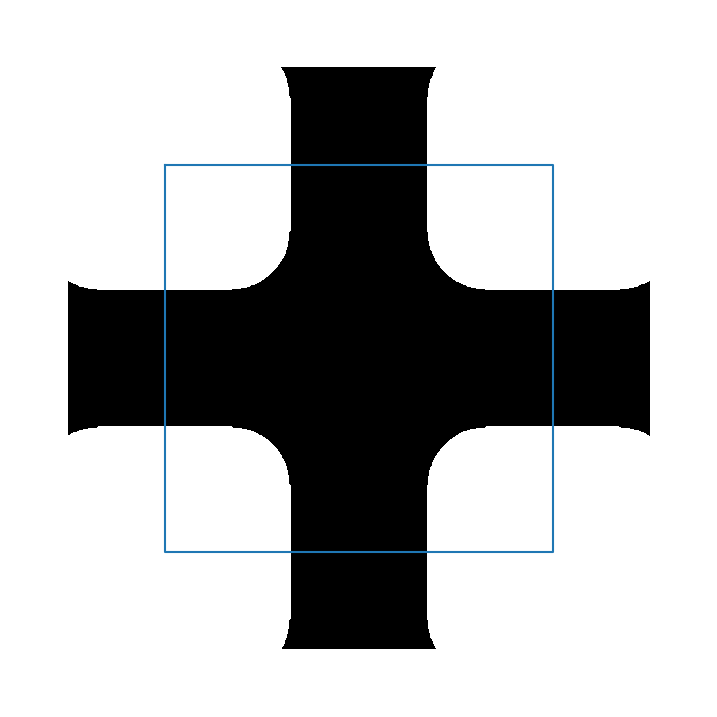

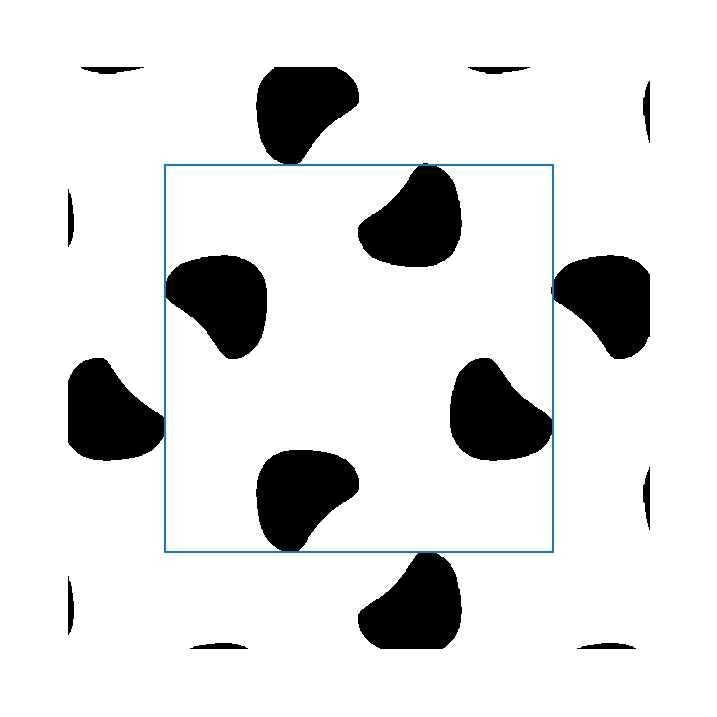

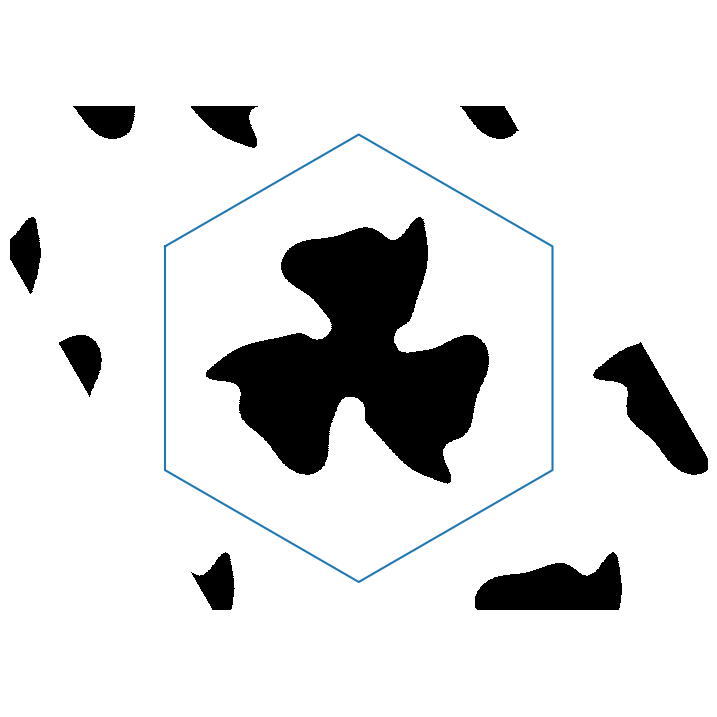

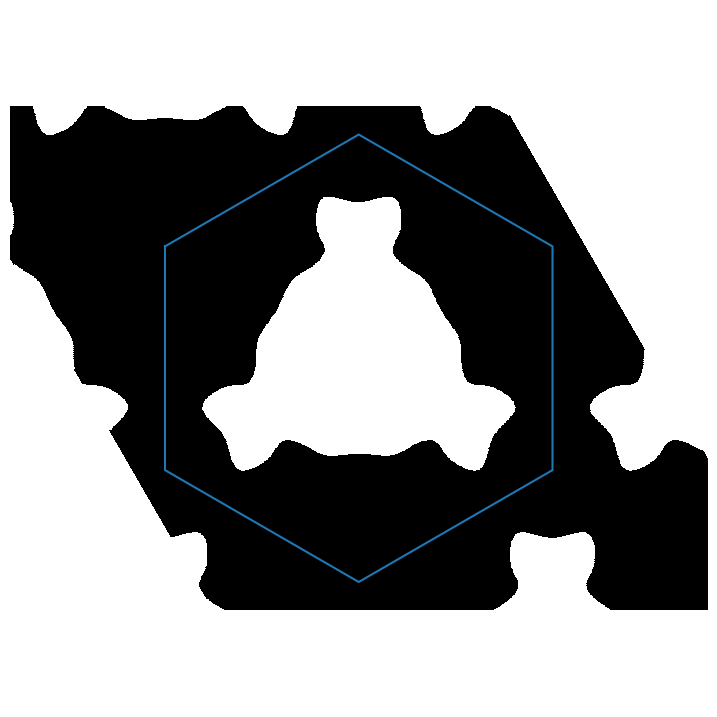

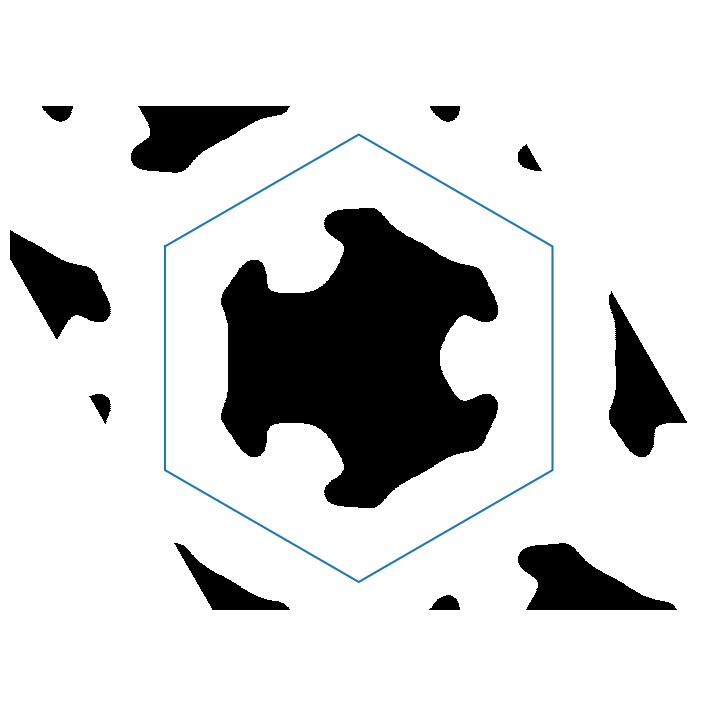

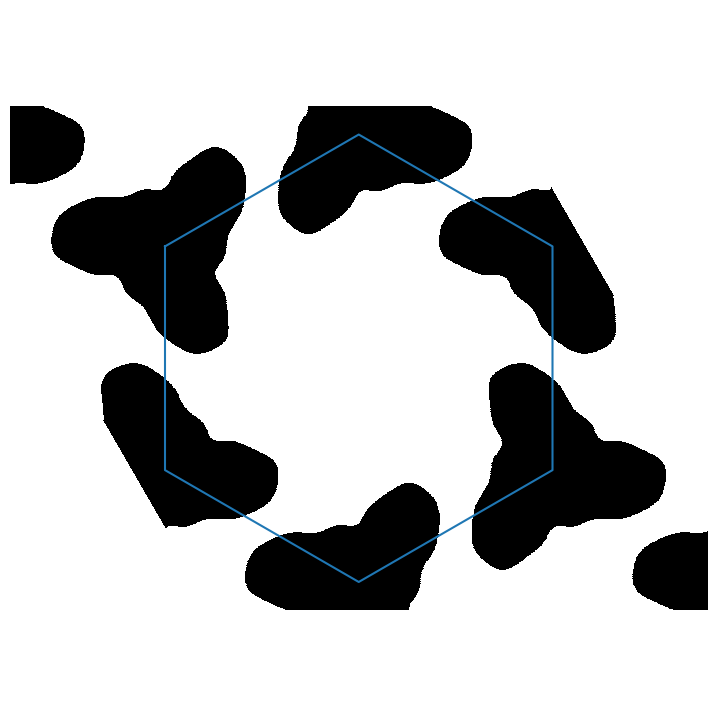

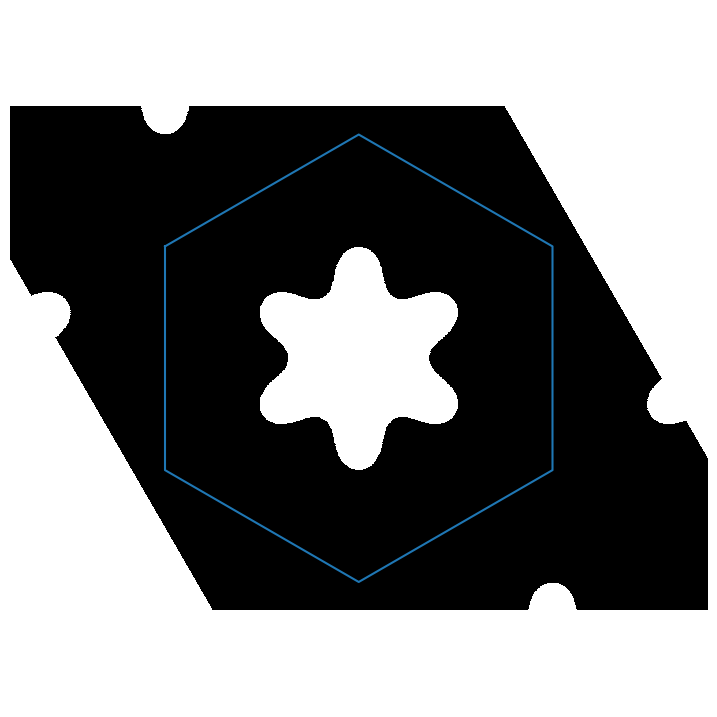

In [4]:
boundaries = 0.9
for (i, (id, sg)) in enumerate(zip(ph_candidates, [2, 6, 9:17...]))
    fig = figure(figsize=(9, 12))
    calcname = "./symeigs/input/dim2-sg$(sg)-$id-res64-tm.sh"

    Rs, flat, isoval, _ = lattice_from_mpbparams(calcname)
    wigner_cell = wignerseitz(Rs)
    wigner_plot(flat, Rs, wigner_cell; isoval=isoval, fig=fig, ax=gca())
    xlim(-boundaries, boundaries)
    ylim(-boundaries, boundaries)
    savefig("Sg$(sg)-example.pdf")
end

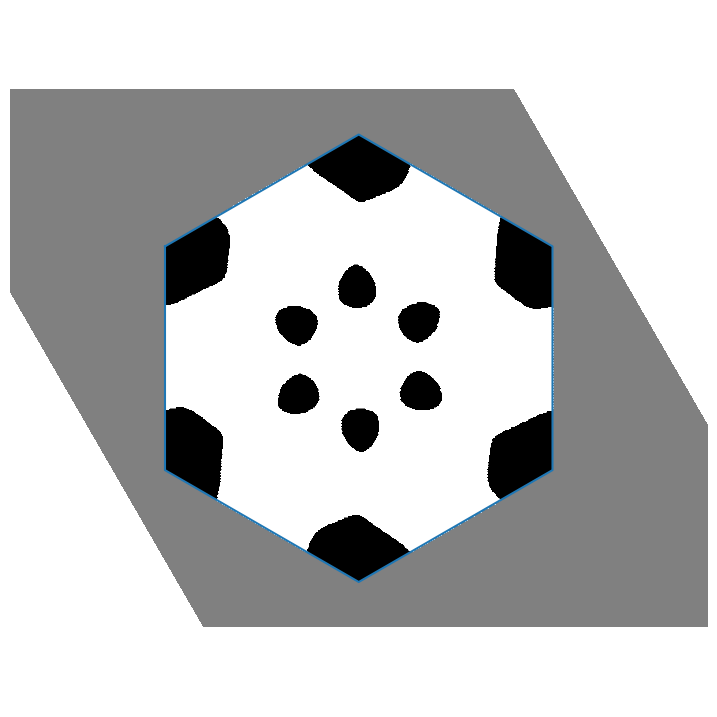

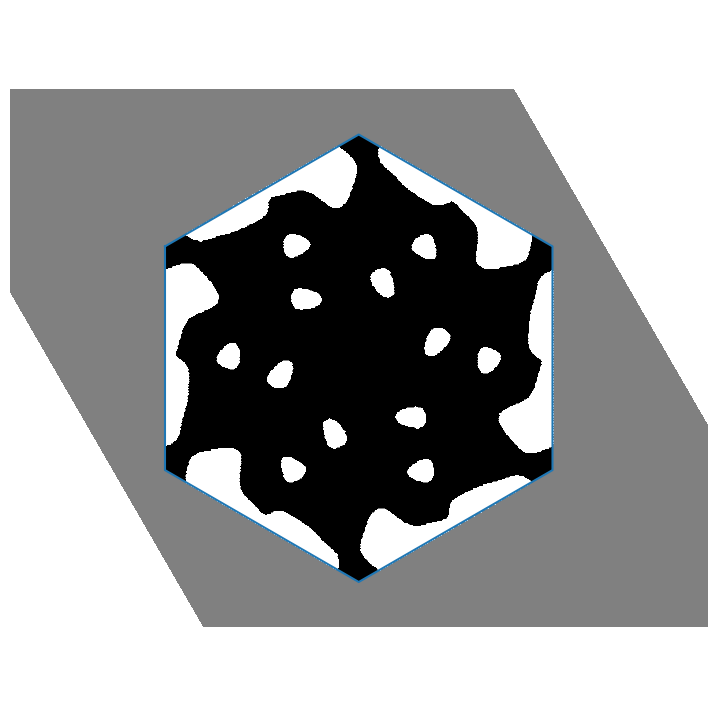

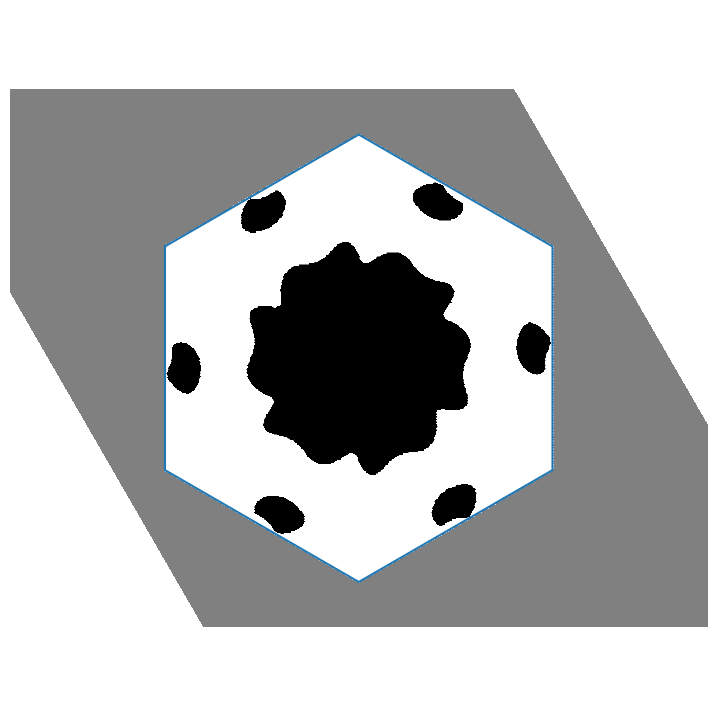

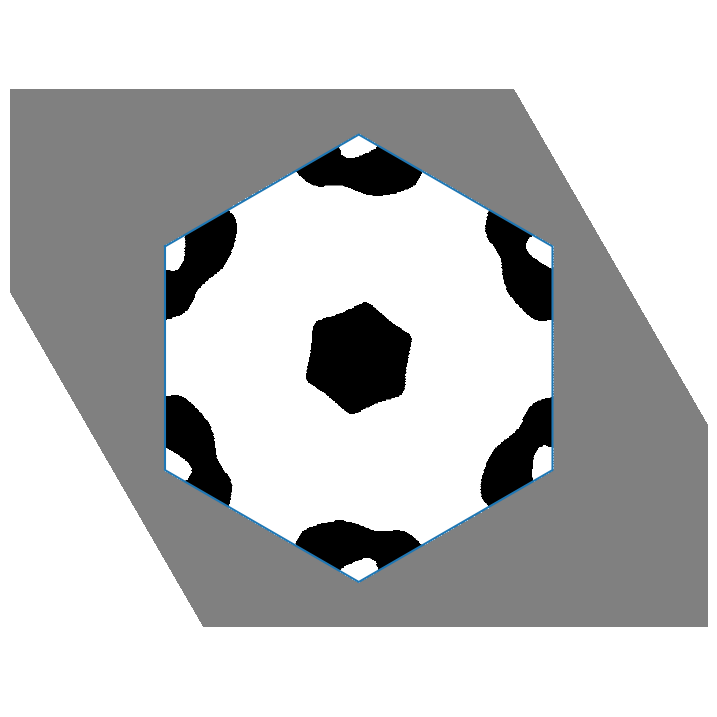

In [5]:
# Below we save the additional sg 16 candidates that we use in the upper panel of figure 1
boundaries = 0.9
sg = 16
for id in 1:4
    fig = figure(figsize=(9, 12))
    calcname = "./symeigs/input/dim2-sg$(sg)-$id-res64-tm.sh"

    Rs, flat, isoval, _ = lattice_from_mpbparams(calcname)
    wigner_cell = wignerseitz(Rs)
    wigner_plot(flat, Rs, wigner_cell; isoval=isoval, fig=fig, ax=gca(), xyz = range(-0.8, 0.8, length=400), in_polygon=true)
    xlim(-boundaries, boundaries)
    ylim(-boundaries, boundaries)
    savefig("Sg$(sg)-example-$(id).pdf")
end

In [62]:
# A dispersion diagram for figure 1
# We choose eps 3 and mode te

In [6]:
sg = 16
id_eps = 3
mode = "te"

loaded_dispersion_data = load("./dispersions/output/sg$sg/eps$(id_eps)/$mode/sg$(sg)-epsid$(id_eps)-res64-$mode.jld2")
loaded_symeigs_data = load("./symeigs/output/sg$sg/eps$(id_eps)/$mode/sg$(sg)-epsid$(id_eps)-res64-$mode.jld2")
input_jld_data = load("./symeigs/output/sg$sg/eps$(id_eps)/$mode/sg$(sg)-epsid$(id_eps)-res64-$mode-input.jld2")

dispersionsv = loaded_dispersion_data["dispersionsv"];
summariesv = loaded_symeigs_data["summariesv"];
cumsummariesv = loaded_dispersion_data["cumsummariesv"];
isovalv = input_jld_data["isovalv"]
flatv = input_jld_data["flatv"]
Rsv = input_jld_data["Rsv"];

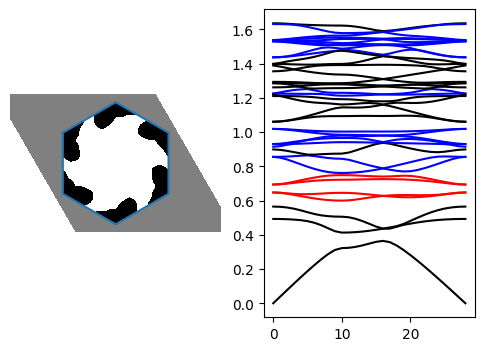

In [7]:
idx1 = 3062
idx2 = 3062
for (i, (flat, Rs, isoval, summaries, dispersions)) in enumerate(zip(flatv[idx1:idx2], Rsv[idx1:idx2], isovalv[idx1:idx2], 
    summariesv[idx1:idx2], dispersionsv[idx1:idx2]))
    fig = figure(figsize=(6, 4))
    wigner_cell = wignerseitz(Rs)
    subplot(1, 2, 1)
    wigner_plot(flat, Rs, wigner_cell; isoval=isoval, fig=fig, ax=gca(), in_polygon=true, xyz=range(-3/4, 3/4, length=600))
    subplot(1, 2, 2)
    band_colors = Dict{UnitRange{Int64}, String}()
    for summary in summaries
        band = summary.band
        topology = summary.topology 
        if summary.topology == TRIVIAL
            push!(band_colors, band => "black")
        elseif topology == NONTRIVIAL
            push!(band_colors, band => "blue")
        elseif topology == FRAGILE
            push!(band_colors, band => "red")
        end
    end
    
    for (band, color) in band_colors
        plot(dispersions[:, band], color = color) # Plot different topologies with different colors
    end
end

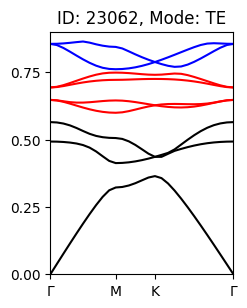

In [115]:
cm = 1/2.54
figure(figsize=(6*cm, 8*cm))
dispersion = dispersionsv[3062]
plot(1:29, dispersion[:, 1:3], color="black")
plot(1:29, dispersion[:, 4:7], color="red")
plot(1:29, dispersion[:, 8:9], color="blue")
xlim(1, 29)
yticks([0, 0.25, 0.5, 0.75])
ylim(0, 0.9)
xticks([1, 11, 17, 29], ["Γ", "M", "K", "Γ"])
title("ID: 23062, Mode: TE")
savefig("Fig1dispersion.pdf")

In [16]:
# Getting the irrep decomposition
broadcast((x, y) -> Crystalline.symvec2string(x, y), [x.n for x in summariesv[3062]], [x.brs.irlabs for x in summariesv[3062]])

16-element Vector{String}:
 "[M₁, Γ₁, K₁]"
 "[M₁+M₂, Γ₁+Γ₂, K₂K₃]"
 "[2M₂, Γ₃Γ₅, K₂K₃]"
 "[2M₁, Γ₄Γ₆, 2K₁]"
 "[M₁+M₂, Γ₄Γ₆, K₂K₃]"
 "[M₂, Γ₂, K₁]"
 "[2M₁+3M₂, Γ₁+2Γ₃Γ₅, K₁+2K₂K₃]"
 "[2M₁+M₂, Γ₂+Γ₄Γ₆, K₁+K₂K₃]"
 "[M₁, Γ₁, K₁]"
 "[M₁+M₂, Γ₄Γ₆, K₂K₃]"
 "[M₁+2M₂, Γ₁+Γ₃Γ₅, K₁+K₂K₃]"
 "[M₁+M₂, Γ₁+Γ₂, K₂K₃]"
 "[M₂, Γ₂, K₁]"
 "[2M₁, Γ₃Γ₅, K₂K₃]"
 "[4M₁+5M₂, Γ₁+2Γ₂+Γ₃Γ₅+2Γ₄Γ₆, 3K₁+3K₂K₃]"
 "[M₁, Γ₁, K₁]"

In [105]:
prod(string.(collect(brs[end].label)[1:end-2]))

"E₂"

In [106]:
brs = bandreps(16, 2);
brs_labs = ["(" * br.wyckpos * "|"  * prod(string.(collect(br.label)[1:end-2])) * ")" for br in brs]

8-element Vector{String}:
 "(3c|A)"
 "(3c|B)"
 "(2b|A)"
 "(2b|E)"
 "(1a|A)"
 "(1a|B)"
 "(1a|E₁)"
 "(1a|E₂)"

In [107]:
#Checking the bandrep decomposition
brs_decomps = broadcast((x, y) -> decompose(x, y), [x.n for x in summariesv[3062]], [x.brs for x in summariesv[3062]])
Crystalline.symvec2string.(brs_decomps, Ref(brs_labs))[1:5]

5-element Vector{String}:
 "[(1a|A)]"
 "[(2b|A)]"
 "[(3c|A)-(1a|A)]"
 "[-(3c|A)+(2b|E)+(1a|A)]"
 "[0.5(3c|B)-0.5(1a|B)+0.5(1a|E₂)]"

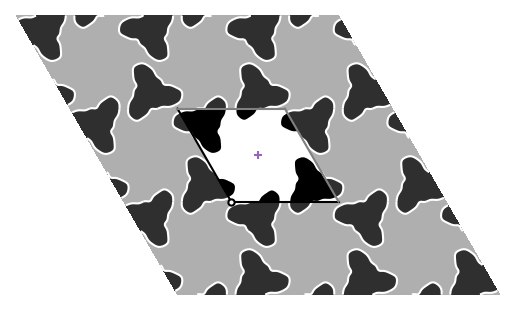

(-0.5:0.010101010101010102:0.5, [0.23176000000000022 0.20593858809054413 … 0.20593858809054283 0.23176000000000022; 0.1385802673620026 0.19778984519709486 … 0.031858015340779075 0.13858026736200238; … ; 0.13858026736200238 0.031858015340779075 … 0.19778984519709486 0.1385802673620026; 0.23176000000000022 0.20593858809054283 … 0.20593858809054413 0.23176000000000022], -1.0893567760774874)

In [8]:
# Final Check that the lattice is correct: 

plot_lattice_from_mpbparams("./symeigs/input/dim2-sg16-3062-res64-te.sh", repeat=1)